In [1]:
#import important library
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [2]:
#download the file 
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-06 11:52:31--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.58MB/s    in 45s     

2020-07-06 11:53:16 (6.89 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
#extract the data from zip
import zipfile, os
local = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local, 'r') #read the zip file
zip_ref.extractall('/tmp') #extract in tmp 
zip_ref.close()

#if you have download manually from dicoding website, the file inside this foleder rockpaperscissors\rps-cv-images
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
#if you want to se the data inside base_dir, just open using os.listdir
# os.listdir(base_dir)

In [4]:
#data generator
data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 15,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'wrap', #nearest, reflect, wrap,constant
    validation_split = 0.20 #split the data    
)

In [5]:
#Priparing train and validation data
train_generator = data_generator.flow_from_directory(
    base_dir,
    target_size = (170, 200),
    color_mode="rgb", #grayscale 1, rgb 3,rgba 4
    batch_size=8,
    subset='training'
)

validation_generator = data_generator.flow_from_directory(
    base_dir,
    target_size = (170, 200),
    color_mode="rgb",
    batch_size=8,
    subset='validation'
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [6]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(170,200,3)), #rgb
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'), #hidden layer
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'), #hidden layer
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(256, (3,3), activation='relu'), #hidden layer
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax') #3 label
])

In [7]:
#copile the model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy', #more than 2 label
              metrics=['accuracy']) #matrics name accuracy

In [8]:
#create treshold
THRESHOLD = 0.98
class modelCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > THRESHOLD):
      print("\nReached %2.2f%% accuracy, STOP training!!" %(THRESHOLD*100))
      self.model.stop_training = True

# Instantiate a callback object
callbacks = modelCallback()

In [10]:
model.fit(
    train_generator,
    steps_per_epoch = 25, #how much the batch that will be executed in every epoch
    epochs= 20,
    validation_data = validation_generator, #showing the accuracy of learning process
    validation_steps = 5,
    callbacks=[callbacks],
    verbose = 2
)

Epoch 1/20
25/25 - 3s - loss: 0.2722 - accuracy: 0.8950 - val_loss: 0.2944 - val_accuracy: 0.8750
Epoch 2/20
25/25 - 3s - loss: 0.1953 - accuracy: 0.9150 - val_loss: 0.3825 - val_accuracy: 0.8250
Epoch 3/20
25/25 - 3s - loss: 0.2020 - accuracy: 0.9200 - val_loss: 0.1480 - val_accuracy: 0.9250
Epoch 4/20
25/25 - 3s - loss: 0.2760 - accuracy: 0.9000 - val_loss: 0.1844 - val_accuracy: 0.9500
Epoch 5/20
25/25 - 3s - loss: 0.2482 - accuracy: 0.8950 - val_loss: 0.1009 - val_accuracy: 0.9750
Epoch 6/20
25/25 - 3s - loss: 0.2899 - accuracy: 0.9150 - val_loss: 0.2928 - val_accuracy: 0.8750
Epoch 7/20
25/25 - 3s - loss: 0.1283 - accuracy: 0.9700 - val_loss: 0.1218 - val_accuracy: 0.9750
Epoch 8/20
25/25 - 3s - loss: 0.2251 - accuracy: 0.9497 - val_loss: 0.1948 - val_accuracy: 0.9250
Epoch 9/20
25/25 - 3s - loss: 0.1734 - accuracy: 0.9500 - val_loss: 0.0906 - val_accuracy: 0.9750
Epoch 10/20
25/25 - 3s - loss: 0.1030 - accuracy: 0.9750 - val_loss: 0.1702 - val_accuracy: 0.9750
Epoch 11/20
25/25 -

Using TensorFlow backend.


Saving 1Io5Ksm3bqy87EAU.png to 1Io5Ksm3bqy87EAU.png
Scissor


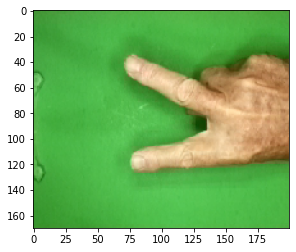

In [11]:
#create an input image and see the label
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

upload = files.upload()

for fn in upload.keys():
  #predict image
  path = fn
  img = image.load_img(path, target_size=(170,200))
  imhplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  # print(classes) return [[1. 0. 0.]] paper 0, rock 1, and scissor 2
  if classes[0][0] == 1:
    print("Paper")
  elif classes[0][1] == 1:
    print("Rock")
  else:
    print("Scissor")

In [12]:
import random
random.randint(0,2) 

2

In [13]:
#paper 0, rock 1, and scissor 2
def rock_paper_scissor(u,c):
  if u == 0:
    if c == 0:
      return 0
    elif c == 1:
      return 1
    else:
      return -1
  if u == 1:
    if c == 1:
      return 0
    elif c == 2:
      return 1
    else:
      return -1
  if u == 2:
    if c == 2:
      return 0
    elif c == 0:
      return 1
    else:
      return -1

============ Round 1 ============


Saving 0vugygEjxQJPr9yz.png to 0vugygEjxQJPr9yz.png
User Choose Paper


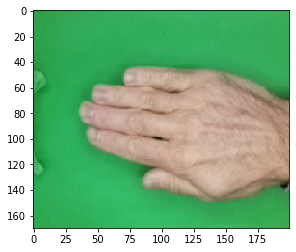

Computer Choose Rock


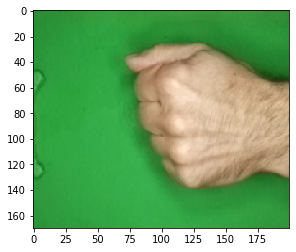

======> User Win
Commulative Score 1 User and 0 Computer
============ Round 2 ============


Saving 1BqjHe5igJAgUjiN.png to 1BqjHe5igJAgUjiN.png
User Choose Rock


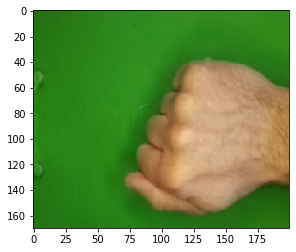

Computer Choose Scissor


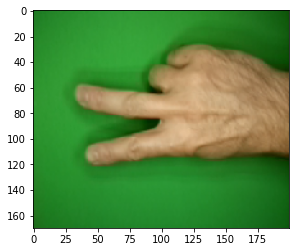

======> User Win
Commulative Score 2 User and 0 Computer
============ Round 3 ============


Saving 0ePX1wuCc3et7leL.png to 0ePX1wuCc3et7leL.png
User Choose Scissor


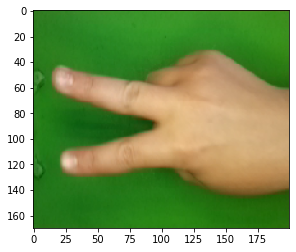

Computer Choose Scissor


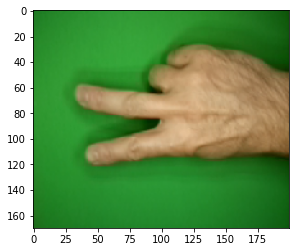

======> Tie
Commulative Score 2 User and 0 Computer
============ Round 4 ============


Saving 1Io5Ksm3bqy87EAU.png to 1Io5Ksm3bqy87EAU (2).png
User Choose Scissor


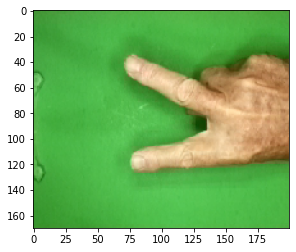

Computer Choose Rock


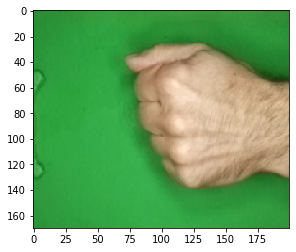

======> Computer Win
Commulative Score 2 User and 1 Computer
============ Round 5 ============


Saving 2C9FEbBklwcVhF3W.png to 2C9FEbBklwcVhF3W.png
User Choose Scissor


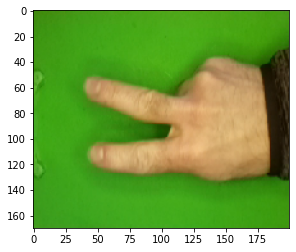

Computer Choose Rock


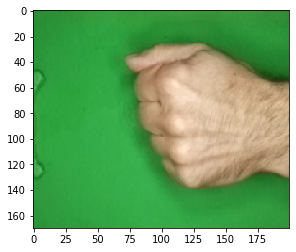

======> Computer Win
Commulative Score 2 User and 2 Computer
============ Round 6 ============


Saving 2UKnsncgPodQLOFR.png to 2UKnsncgPodQLOFR.png
User Choose Paper


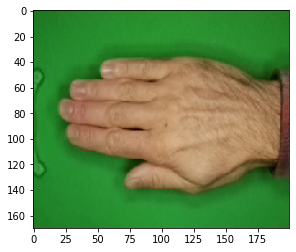

Computer Choose Paper


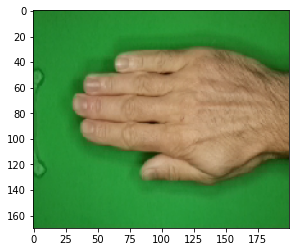

======> Tie
Commulative Score 2 User and 2 Computer
============ Round 7 ============


Saving 1Tt9U9SzrOm98Xtw.png to 1Tt9U9SzrOm98Xtw.png
User Choose Paper


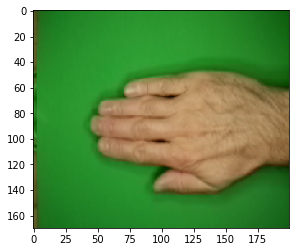

Computer Choose Rock


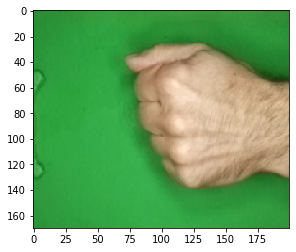

======> User Win
Commulative Score 3 User and 2 Computer
|           Game END           |
|      You are The WINNER      |


In [15]:
#Let's play the game
#make sure you already upload paper.png, rock.png and scissor.png
import random
com, player, round = 0,0,1

while com < 3 and player < 3:
  print("============ Round "+str(round)+" ============")
  upload = files.upload()
  suit_player = 0
  suit_com = random.randint(0,2)
  image_name = 'paper.png'
  if suit_com == 1:
    image_name = 'rock.png'
  elif suit_com == 2:
    image_name = 'scissor.png'
  img2 = image.load_img(image_name, target_size=(170,200))

  for fn in upload.keys():
    #predict image
    path = fn
    img = image.load_img(path, target_size=(170,200))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    # print(classes) return [[1. 0. 0.]] paper 0, rock 1, and scissor 2
    if classes[0][0] == 1:
      print("User Choose Paper")
    elif classes[0][1] == 1:
      print("User Choose Rock")
      suit_player = 1
    else:
      print("User Choose Scissor")
      suit_player = 2
    plt.imshow(img)
    plt.show()
  
  if suit_com == 0:
    print("Computer Choose Paper")
  elif suit_com == 1:
    print("Computer Choose Rock")
  else:
    print("Computer Choose Scissor")
  plt.imshow(img2)
  plt.show()
  round += 1
  result = rock_paper_scissor(suit_player, suit_com)
  if result == 1:
    print("======> User Win")
    player +=1
  elif result == -1:
    com += 1
    print("======> Computer Win")
  else:
    print("======> Tie")
  print("Commulative Score {} User and {} Computer" .format(player,com))
  if com == 3 :
    print("================================")
    print("|           Game END           |")
    print("|    The WINNER is COMPUTER    |")
    print("================================")
  elif player == 3:
    print("================================")
    print("|           Game END           |")
    print("|      You are The WINNER      |")
    print("================================")